In [2]:
#Libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#EDA

df = pd.read_csv('time-log-shortened.csv')
df = df.drop("Unnamed: 0", axis=1)
df.head()

,date,getup,dinner,weekend,afterdinner_break,help,wakeup_breaks,last_productive,exercise,prev_bedtime,...,beforelunch_break,appt,beforelunch_nonbreak,wakeup,break,bus,afterdinner_nonbreak,actualday,planning,sleep_incl_prep
0,2020-11-12,09:10:00,7.0,0.0,12.0,0.0,8.0,22:55:00,0.0,22:45:00,...,19.0,0.0,35.0,08:30:00,43.0,0.0,44.0,3.0,8.0,0 days 09:45:00
1,2020-11-13,08:50:00,7.0,0.0,31.0,0.0,6.0,23:20:00,0.0,23:35:00,...,14.0,0.0,42.0,08:20:00,86.0,0.0,22.0,4.0,11.0,0 days 08:45:00
2,2020-11-14,11:30:00,8.0,1.0,14.0,0.0,6.0,22:40:00,8.0,23:20:00,...,6.0,0.0,18.0,11:00:00,37.0,0.0,43.0,5.0,2.0,0 days 11:40:00
3,2020-11-15,10:00:00,8.0,1.0,35.0,0.0,11.0,22:20:00,0.0,23:40:00,...,13.0,0.0,34.0,09:05:00,63.0,0.0,21.0,6.0,30.0,0 days 09:25:00
4,2020-11-16,08:35:00,11.0,0.0,34.0,0.0,0.0,21:40:00,10.0,23:35:00,...,3.0,0.0,50.0,08:35:00,48.0,0.0,22.0,0.0,23.0,0 days 09:00:00


In [8]:
print(df.shape)
print(df.info())

(534, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  534 non-null    object 
 1   getup                 534 non-null    object 
 2   dinner                534 non-null    float64
 3   weekend               534 non-null    float64
 4   afterdinner_break     534 non-null    float64
 5   help                  534 non-null    float64
 6   wakeup_breaks         534 non-null    float64
 7   last_productive       534 non-null    object 
 8   exercise              534 non-null    float64
 9   prev_bedtime          534 non-null    object 
 10  walk                  534 non-null    float64
 11  breakfast             534 non-null    float64
 12  total_class_time      534 non-null    float64
 13  lunch                 534 non-null    float64
 14  bedtime               534 non-null    object 
 15  bike         

<AxesSubplot:>

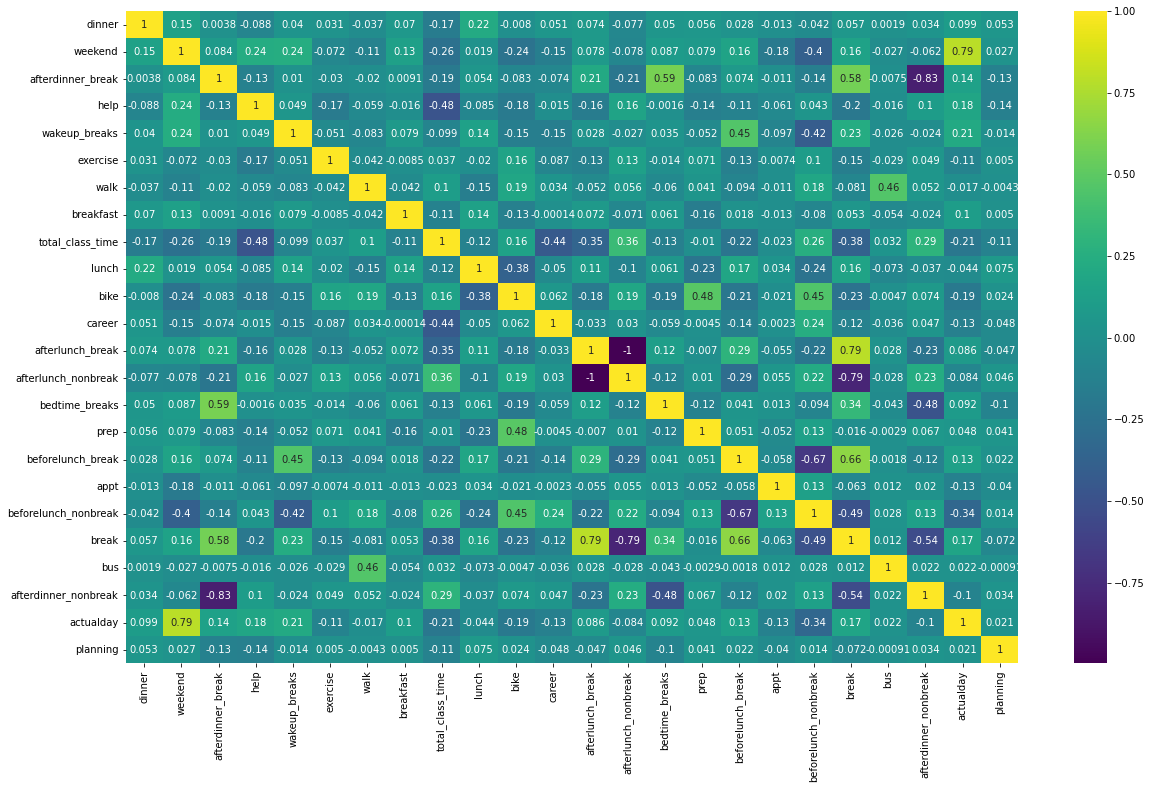

In [9]:
#Correlation Matrix
cm = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

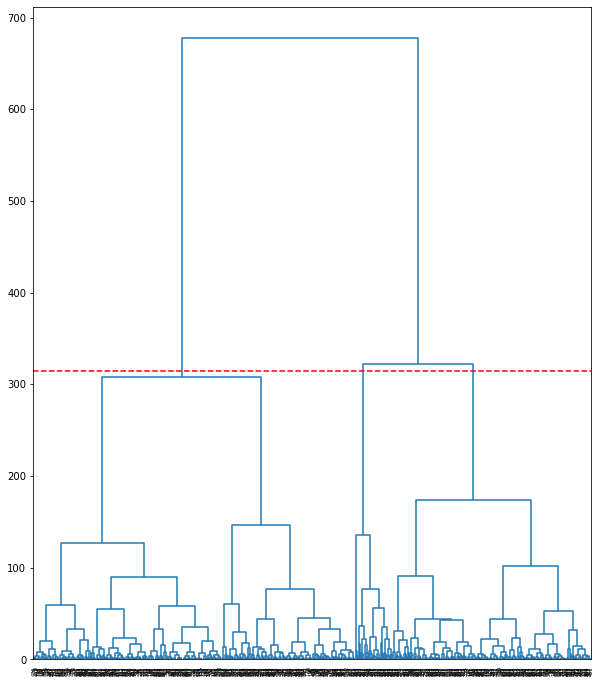

In [16]:
X = pd.DataFrame(df, index = df.index, columns = df.columns)
X = X[['break','afterlunch_break']]

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 12))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=315, color='r', linestyle='--')
plt.show()

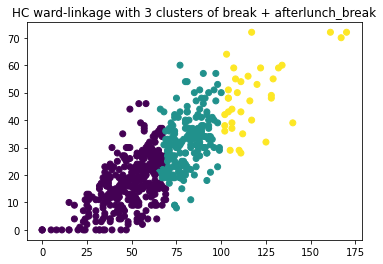

In [17]:
HCward=AgglomerativeClustering(n_clusters=3, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 3 clusters of break + afterlunch_break')
plt.show()

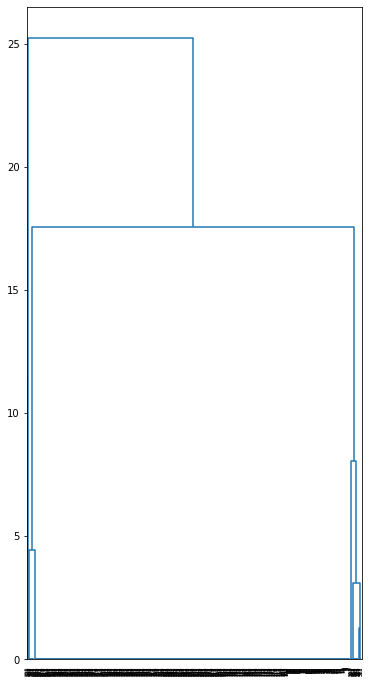

In [20]:
X = pd.DataFrame(df, index = df.index, columns = df.columns)
X = X[['bus','walk']]

linked = linkage(X, 'ward')

plt.figure(figsize=(6, 12))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=315, color='r', linestyle='--')
plt.show()

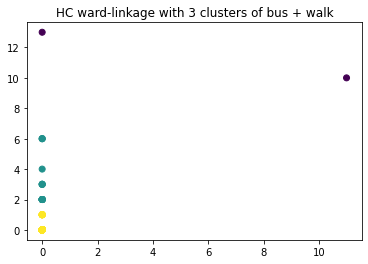

In [21]:
HCward=AgglomerativeClustering(n_clusters=3, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 3 clusters of bus + walk')
plt.show()

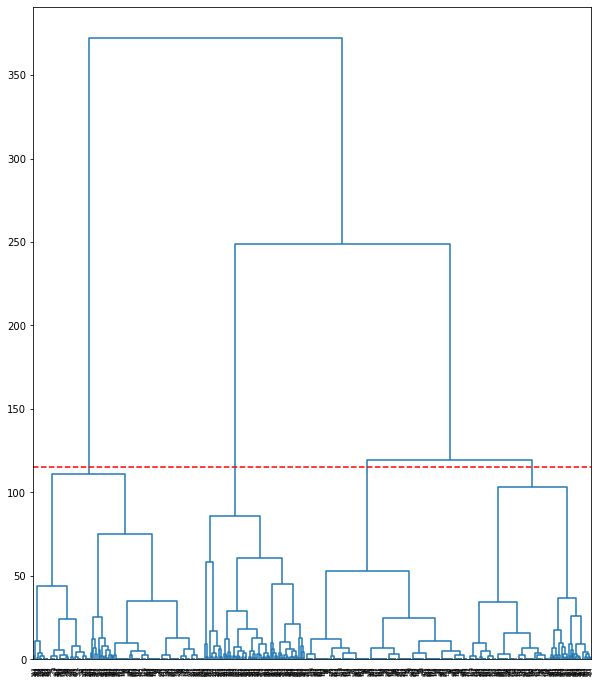

In [25]:

X = pd.DataFrame(df, index = df.index, columns = df.columns)
X = X[['beforelunch_nonbreak','bike']]

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 12))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=115, color='r', linestyle='--')
plt.show()

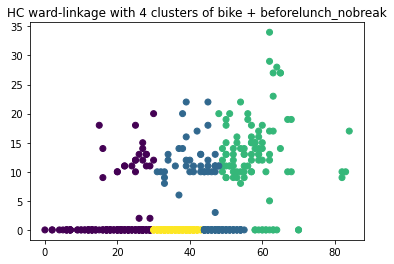

In [26]:
HCward=AgglomerativeClustering(n_clusters=4, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 4 clusters of bike + beforelunch_nobreak')
plt.show()

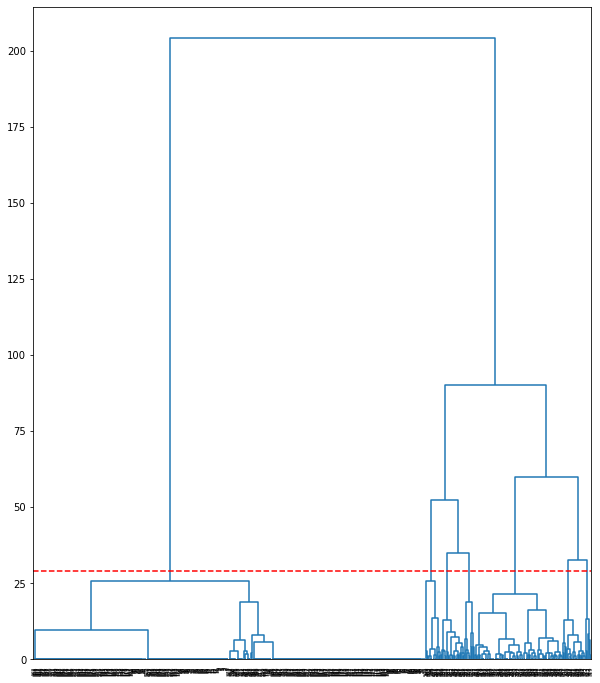

In [29]:

X = pd.DataFrame(df, index = df.index, columns = df.columns)
X = X[['prep','bike']]

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 12))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=29, color='r', linestyle='--')
plt.show()

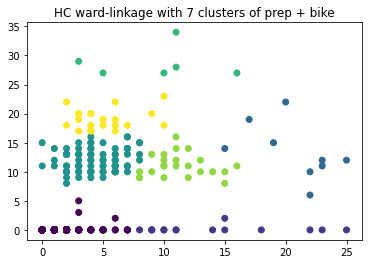

In [30]:
HCward=AgglomerativeClustering(n_clusters=7, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 7 clusters of prep + bike')
plt.show()

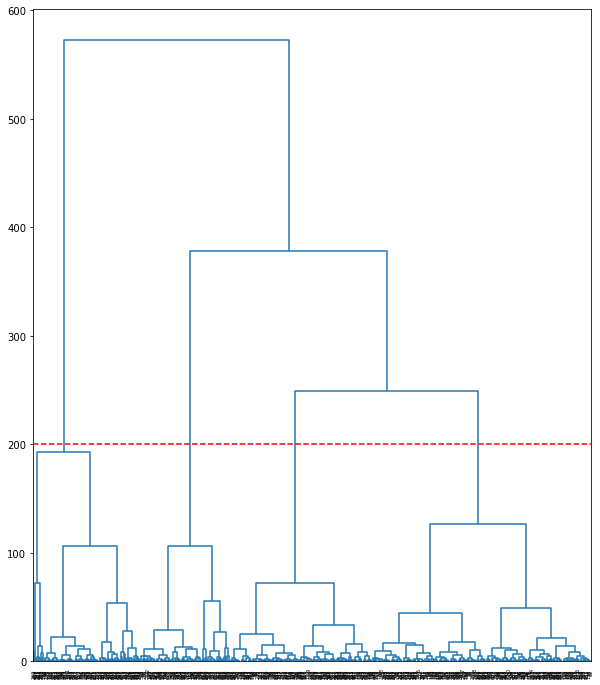

In [5]:

X = pd.DataFrame(df, index = df.index, columns = df.columns)
X = X[['actualday','break']]

linked = linkage(X, 'ward')

plt.figure(figsize=(10, 12))
dendrogram(linked,
           color_threshold=-1,
           orientation='top',
           )
plt.axhline(y=200, color='r', linestyle='--')
plt.show()

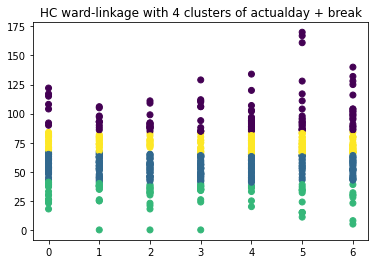

In [8]:
HCward=AgglomerativeClustering(n_clusters=4, linkage='ward')

HCward.fit(X)

plt.scatter(X.values[:, 0], X.values[:, 1], c=HCward.labels_, cmap='viridis')

plt.title('HC ward-linkage with 4 clusters of actualday + break')
plt.show()